Is it the best way to get the dataset?


In [3]:
# Clone the entire repo.
!git clone -l -s https://github.com/karolpiczak/ESC-50.git
!ls

fatal: destination path 'ESC-50' already exists and is not an empty directory.
drive  ESC-50  sample_data


In [1]:
from pathlib import Path
from scipy.io import wavfile
from IPython.display import Audio
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import librosa
from tqdm import tqdm, tqdm_notebook, notebook
import gc

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

Import wav files

In [4]:



ROOT = '/content/ESC-50/audio'

audio_list = []
for audio in Path(ROOT).iterdir():
    try:
        sr, this_sound = wavfile.read(audio)
        audio_list.append(this_sound)
    except:
        print('cannot read ', str(audio))

print(len(audio_list))
audio = (np.array(audio_list))
print(np.shape(audio))

del audio_list

#why is not already normalized
audio = np.float32(audio)/np.max(np.abs(audio))

2000
(2000, 220500)


In [5]:
colnames = ['filename','fold','target','category','esc10','src_file','take']
csv = pd.read_csv('/content/ESC-50/meta/esc50.csv', header=0)
label_list = csv.target.tolist()
fold_list = csv.fold.tolist()
category_list = csv.category.tolist()

print(label_list)
print(fold_list)

label = np.float32(np.array(label_list))

class_dict = dict(zip(label_list, category_list))

print(class_dict)

[0, 14, 36, 36, 19, 19, 30, 34, 9, 30, 30, 22, 22, 22, 0, 22, 19, 48, 48, 48, 48, 22, 22, 22, 41, 47, 31, 17, 45, 8, 15, 15, 15, 46, 46, 37, 32, 16, 37, 25, 25, 25, 25, 25, 25, 4, 4, 48, 48, 3, 15, 27, 27, 43, 12, 40, 40, 40, 40, 40, 40, 29, 10, 12, 7, 12, 12, 12, 26, 4, 6, 6, 40, 40, 44, 44, 23, 31, 20, 4, 4, 4, 49, 43, 24, 24, 7, 8, 8, 36, 36, 36, 41, 41, 41, 39, 3, 28, 18, 2, 2, 2, 2, 2, 20, 20, 20, 10, 46, 35, 38, 38, 25, 20, 20, 46, 44, 15, 15, 19, 19, 49, 35, 35, 43, 43, 19, 19, 19, 47, 43, 48, 48, 2, 2, 2, 21, 43, 43, 30, 10, 1, 35, 35, 28, 28, 1, 18, 11, 11, 43, 16, 10, 21, 26, 26, 18, 0, 0, 23, 23, 23, 24, 6, 6, 42, 42, 21, 4, 4, 0, 35, 35, 29, 26, 5, 5, 1, 1, 14, 14, 37, 38, 26, 26, 23, 23, 23, 23, 47, 29, 14, 14, 9, 9, 11, 11, 1, 28, 46, 28, 1, 28, 34, 12, 38, 1, 11, 34, 47, 47, 47, 47, 1, 27, 31, 14, 12, 18, 49, 36, 7, 7, 41, 41, 21, 21, 16, 16, 5, 5, 5, 28, 46, 38, 35, 8, 8, 10, 44, 44, 15, 17, 44, 17, 16, 16, 16, 25, 18, 17, 17, 33, 33, 33, 33, 33, 33, 33, 33, 24, 30, 24,

rm: cannot remove 'calc.*': No such file or directory
--2020-09-04 14:30:03--  https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/calc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20524 (20K) [text/plain]
Saving to: ‘calc.py’

calc.py             100%[===================>]  20.04K  --.-KB/s    in 0.004s  

2020-09-04 14:30:03 (5.11 MB/s) - ‘calc.py’ saved [20524/20524]

[ 0.07315287  0.10937834  0.11996826 ... -0.02923673 -0.01419111
 -0.00219733]
44100


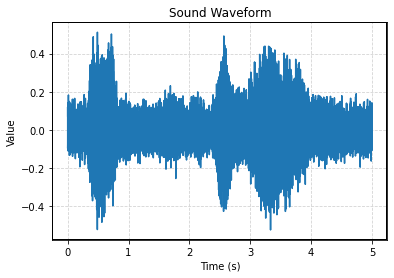

In [ ]:
# Load the calc module
!rm calc.*
!wget https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/calc.py

import calc
print(audio[0])
print(sr)
t = np.linspace(0,5, sr*5)

calc.setColaboratory(True)

# Show waveform
calc.plot11(t,audio[0],"Sound Waveform","Time (s)","Value")

In [ ]:

ll = np.zeros((2000,1))
for i in range(len(audio_list)):
    ll[i] = len(audio_list[i])

plt.plot(ll)

#perfetto sono tutti uguali

NameError: ignored

# PREPROCESSING

In [6]:


#audio augmentation
def audio_aug(y):
    choice = int(np.random.choice(13,1))
    if choice == 0:
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=1)
    elif choice == 1:   
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=2)
    elif choice == 2:
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=3)
    elif choice == 3:   
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=3.5)
    elif choice == 4:
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=-1)
    elif choice == 5:
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=-2)
    elif choice == 6:
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=-3)
    elif choice == 7:
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=-3.5)
    elif choice == 8:
        ya = librosa.effects.time_stretch(y, 0.75)
    elif choice == 9:
        ya = librosa.effects.time_stretch(y, 0.8)
    elif choice == 10:    
        ya = librosa.effects.time_stretch(y, 0.85)
    elif choice == 11:
        ya = librosa.effects.time_stretch(y, 0.9)
    elif choice == 12:
        ya = librosa.effects.time_stretch(y, 0.95)
    return ya

def audio_aug2(y):
    choice = int(np.random.randint(2))
    if choice == 0:
        step = np.random.uniform(low=-3.5, high=3.5)
        ya = librosa.effects.pitch_shift(y, sr=44100, n_steps=step)
    elif choice == 1:
        rate = np.random.uniform(low=0.8, high=1)
        ya = librosa.effects.time_stretch(y, rate)
    return ya


In [7]:



n_mel = 60 
n_t = 200
#how much augmentation
aug_rate = 4
data_mel = np.zeros((aug_rate*len(label),n_mel, n_t))
for i in notebook.tqdm(range(len(label))):
    # if i % 10 == 0:
    #     print(i)
    for j in range(aug_rate):        
        data_mel[i*aug_rate+j,:,:] = librosa.amplitude_to_db(np.abs(librosa.feature.melspectrogram(audio_aug2(np.asfortranarray(audio[i])), n_fft=1024, hop_length=1102, n_mels=n_mel))[:, :200])


label_aug = np.repeat(label, aug_rate, axis=0)

print(np.shape(data_mel),'  ', np.shape(label_aug))


np.save('/content/drive/My Drive/hda_data/data_mel4.npy', data_mel)
np.save('/content/drive/My Drive/hda_data/label_aug4.npy', label_aug)
# print('save ok')


(8000, 60, 200)    (8000,)


In [ ]:
print(np.shape(label_aug))
print(label_aug[0:40])
print(label[0:10])

(6000,)
[ 0.  0.  0. 14. 14. 14. 36. 36. 36. 36. 36. 36. 19. 19. 19. 19. 19. 19.
 30. 30. 30. 34. 34. 34.  9.  9.  9. 30. 30. 30. 30. 30. 30. 22. 22. 22.
 22. 22. 22. 22.]
[ 0. 14. 36. 36. 19. 19. 30. 34.  9. 30.]


In [7]:
# del audio
del data_mel
gc.collect()

NameError: ignored

or load pre augmented data

In [ ]:
np.save('/content/drive/My Drive/hda_data/data_mel5.npy', data_mel)
np.save('/content/drive/My Drive/hda_data/label_aug5.npy', label_aug)

In [2]:
filename = 'data_mel4.npy'
data_mel = np.load('/content/drive/My Drive/hda_data/'+filename)

labelname = 'label_aug4.npy'
label_aug = np.load('/content/drive/My Drive/hda_data/'+labelname)

FileNotFoundError: ignored

Slicing audio

In [8]:
def normalize01(x):
    y = (x - np.min(x)) / (np.max(x) - np.min(x))
    return y

data_mel = normalize01(data_mel)

n_mel = 60

good_slice = 0
bad_slice = 0
label_slice = np.zeros((32*label_aug.shape[0], 1))
print(np.shape(label_slice))
slice_len = 40
slice_mel = np.zeros((32*len(label_aug), n_mel, slice_len))
print(np.shape(slice_mel))

for i in notebook.tqdm(range(len(label_aug))):
    for j in range(32):
        
        this_slice = data_mel[i,:,j*5:j*5+40]
        floor = np.min(this_slice)
        if np.max(this_slice)==np.min(this_slice):   
            bad_slice +=1
        else:           
            slice_mel[good_slice] = data_mel[i,:,j*5:j*5+40] 
            label_slice[good_slice] = label_aug[i]
            good_slice +=1
slice_mel = slice_mel[:good_slice]
label_slice = label_slice[:good_slice]


slice_mel = np.expand_dims(slice_mel, -1)
# slice_mel = np.float32(slice_mel/np.max(np.abs(slice_mel)))
# slice_mel = np.float32((slice_mel - np.min(slice_mel)) / (np.max(slice_mel) - np.min(slice_mel)))

print(np.shape(slice_mel), '  ', np.shape(label_slice))
print(np.max(slice_mel))


gc.collect

(256000, 1)
(256000, 60, 40)



(232766, 60, 40, 1)    (232766, 1)
1.0


<function gc.collect>

In [6]:
print(bad_slice)
print(np.shape(slice_mel))

print(np.min(slice_mel))

29267
(290733, 60, 40, 1)
0.0


VAE

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [6]:
def define_encoder(latent_dim):
    encoder_inputs = keras.Input(shape=(60, 40, 1))
    x = layers.Conv2D(64, (3,3), strides=(2,2), padding="same", kernel_regularizer='l2')(encoder_inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(128, (3,3), strides=(2,2), padding="same", kernel_regularizer='l2')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(128, (3,3), strides=(1,1), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="sigmoid")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder

def define_decoder(latent_dim):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(15 * 10 * 64)(latent_inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Reshape((15, 10, 64))(x)
    x = layers.Conv2DTranspose(128, (3,3), strides=2, padding="same", kernel_regularizer="l2")(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(128, (3,3), strides=(1,1), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2DTranspose(64, (3,3), strides=2, padding="same", kernel_regularizer="l2")(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.2)(x)
    x = BatchNormalization()(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder


In [7]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 40 * 60
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss_debug": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [8]:
gc.collect()

latent_dim = 200
n_epochs = 20

encoder = define_encoder(latent_dim)
decoder = define_decoder(latent_dim)
vae = VAE(encoder, decoder)

vae.compile(optimizer=keras.optimizers.Adam())
history = vae.fit(slice_mel, epochs=n_epochs, batch_size=64)

Epoch 1/20
4543/4543 [==============================] - 156s 34ms/step - loss_debug: 1443.9051 - reconstruction_loss: 1443.0026 - kl_loss: 0.9024
Epoch 2/20
4543/4543 [==============================] - 158s 35ms/step - loss_debug: 1438.6089 - reconstruction_loss: 1437.7423 - kl_loss: 0.8666
Epoch 3/20
4543/4543 [==============================] - 159s 35ms/step - loss_debug: 1437.7610 - reconstruction_loss: 1436.9356 - kl_loss: 0.8254
Epoch 4/20
4543/4543 [==============================] - 160s 35ms/step - loss_debug: 1437.3898 - reconstruction_loss: 1436.5941 - kl_loss: 0.7957
Epoch 5/20
4543/4543 [==============================] - 160s 35ms/step - loss_debug: 1437.1387 - reconstruction_loss: 1436.3658 - kl_loss: 0.7729
Epoch 6/20
4543/4543 [==============================] - 159s 35ms/step - loss_debug: 1436.9622 - reconstruction_loss: 1436.2056 - kl_loss: 0.7566
Epoch 7/20
4543/4543 [==============================] - 159s 35ms/step - loss_debug: 1436.8561 - reconstruction_loss: 1436.1

In [10]:
encoder.save('/content/drive/My Drive/hda_data/encoder_x5_1.h5')
# sampling layer da problemi con il save load 

In [9]:
encoder = keras.models.load_model('/content/drive/My Drive/hda_data/encoder_x5_1.h5', custom_objects={'Sampling': Sampling})

In [ ]:
vae.summary()

ValueError: ignored

# Classifier from latent space

In [ ]:
# from sklearn.model_selection import KFold
# ci ripenso a fare il k fold

#sarebbe da fare il validation sulle robe senza augmentation e poi anche il pooling del dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(slice_mel, label_slice, test_size=0.2, random_state=111 )

print(np.shape(X_train), '  ', np.shape(X_val))

(139559, 60, 40, 1)    (34890, 60, 40, 1)


In [12]:
del slice_mel
gc.collect()

1439

In [11]:
def normalize01(x):
    y = (x - np.min(x)) / (np.max(x) - np.min(x))
    return y

X_train_enc = encoder.predict(X_train)[2]
X_val_enc = encoder.predict(X_val)[2]

X_train_enc = normalize01(X_train_enc)
X_val_enc = normalize01(X_val_enc)

print(np.max(X_train_enc), '  ', np.min(X_val_enc))
# X_train_enc = np.expand_dims(X_train_enc, -1)
# X_val_enc = np.expand_dims(X_val_enc, -1)
print(np.shape(X_train_enc), '  ', np.shape(X_val_enc))


1.0    0.0
(139559, 200)    (34890, 200)


defin classifier

In [ ]:
print(np.shape(y_train))
print(y_train)
print(np.max(y_train))

(139559, 1)
[[19.]
 [14.]
 [37.]
 ...
 [15.]
 [15.]
 [38.]]
49.0


In [32]:
def define_classifier(latent_dim):
    input = keras.Input(shape=(latent_dim))
    x = layers.Dense(100, activation='relu')(input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    # x = layers.Dense(100, activation='relu')(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.Dropout(0.1)(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(50, activation='softmax')(x)
    classifier = keras.Model(input, x, name='classifier')
    return classifier

In [9]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [23]:
latent_dim = 200

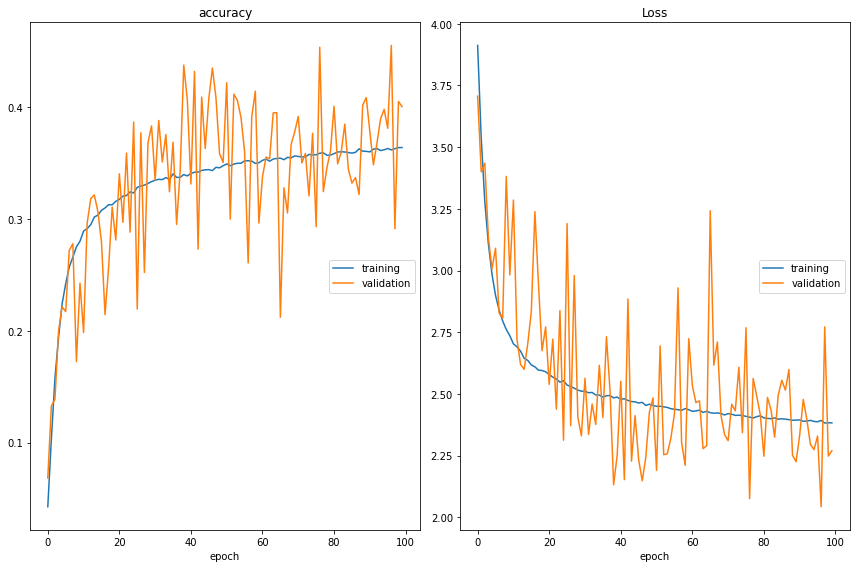

accuracy
	training         	 (min:    0.043, max:    0.364, cur:    0.364)
	validation       	 (min:    0.068, max:    0.455, cur:    0.401)
Loss
	training         	 (min:    2.382, max:    3.912, cur:    2.383)
	validation       	 (min:    2.043, max:    3.707, cur:    2.270)


In [34]:


batch_size = 128
epochs = 100

classifier = define_classifier(latent_dim)
classifier.compile(optimizer=keras.optimizers.RMSprop(), loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
classifier.summary()

history = classifier.fit(X_train_enc, y_train, batch_size=batch_size, epochs=epochs, verbose=0, callbacks=[PlotLossesKeras()], validation_data=(X_val_enc, y_val))

# Classifier from mel features

In [10]:
from sklearn.model_selection import train_test_split
gc.collect()
X_train, X_val, y_train, y_val = train_test_split(slice_mel, label_slice, test_size=0.2, random_state=111 )

print(np.shape(X_train), '  ', np.shape(X_val))

(186212, 60, 40, 1)    (46554, 60, 40, 1)


In [11]:
del slice_mel
gc.collect()

0

In [14]:
def define_mel_classifier():
    input = keras.Input(shape=(60,40,1))
    x = layers.Conv2D(32,   kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(input)
    x = layers.Dropout(0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)  #dont reduce dimension
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)   
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)   
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(50, activation='softmax')(x)
    mel_classifier = keras.Model(input, x, name='mel_classifier')
    return mel_classifier


def define_mel_classifier():
    input = keras.Input(shape=(60,40,1))
    x = layers.Conv2D(64,   kernel_size=(3,1), strides=(2,2), padding='same')(input)
    x = layers.Conv2D(64,   kernel_size=(1,3), strides=(2,2), padding='same')(x)
    x = layers.ReLU()(x)
    # x = layers.Dropout(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=(3,1), strides=(1,1), padding='same')(x)
    x = layers.Conv2D(64, kernel_size=(1,3), strides=(1,1), padding='same')(x)
    x = layers.ReLU()(x)
    # x = layers.Dropout(0.12)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3,1), strides=(1,1), padding='same')(x) 
    x = layers.Conv2D(128, kernel_size=(1,3), strides=(1,1), padding='same')(x) 
    x = layers.Dropout(0.12)(x)
    x = layers.BatchNormalization()(x)   
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.BatchNormalization()(x)   
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(50, activation='softmax')(x)
    mel_classifier = keras.Model(input, x, name='mel_classifier')
    return mel_classifier

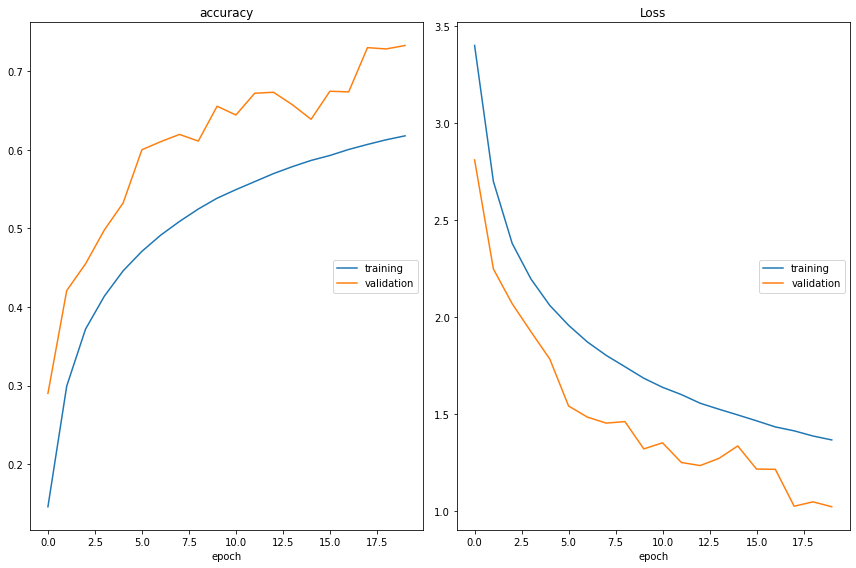

accuracy
	training         	 (min:    0.146, max:    0.618, cur:    0.618)
	validation       	 (min:    0.290, max:    0.733, cur:    0.733)
Loss
	training         	 (min:    1.369, max:    3.401, cur:    1.369)
	validation       	 (min:    1.024, max:    2.811, cur:    1.024)


In [ ]:
gc.collect()

batch_size = 128
epochs = 130

mel_classifier = define_mel_classifier()
mel_classifier.compile(optimizer=keras.optimizers.RMSprop(), loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
mel_classifier.summary()

history = mel_classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, callbacks=[PlotLossesKeras()], validation_data=(X_val
, y_val))

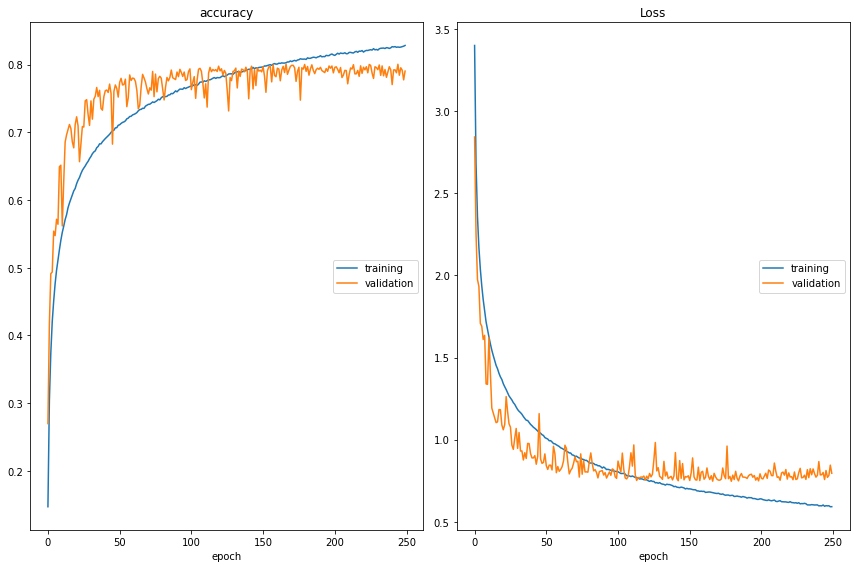

accuracy
	training         	 (min:    0.147, max:    0.828, cur:    0.828)
	validation       	 (min:    0.270, max:    0.801, cur:    0.791)
Loss
	training         	 (min:    0.592, max:    3.401, cur:    0.592)
	validation       	 (min:    0.747, max:    2.844, cur:    0.795)


In [13]:
gc.collect()

batch_size = 128
epochs = 250

mel_classifier = define_mel_classifier()
mel_classifier.compile(optimizer=keras.optimizers.RMSprop(), loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
mel_classifier.summary()

history = mel_classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, callbacks=[PlotLossesKeras()], validation_data=(X_val
, y_val))